<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ТВ,--Шоу-во-время-перерыва-в-матче-и-Большая-Игра" data-toc-modified-id="ТВ,--Шоу-во-время-перерыва-в-матче-и-Большая-Игра-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ТВ,  Шоу во время перерыва в матче и Большая Игра</a></span></li><li><span><a href="#Общее-рассмотрение-датасетов" data-toc-modified-id="Общее-рассмотрение-датасетов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Общее рассмотрение датасетов</a></span></li><li><span><a href="#Совокупное-распределение-очков-игры" data-toc-modified-id="Совокупное-распределение-очков-игры-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Совокупное распределение очков игры</a></span></li><li><span><a href="#Распределение-разрывов-в-очках-игры" data-toc-modified-id="Распределение-разрывов-в-очках-игры-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Распределение разрывов в очках игры</a></span></li><li><span><a href="#Взаимосвязь-разрывов-в-очках-с-общим-количеством-телевизионных-просмотров" data-toc-modified-id="Взаимосвязь-разрывов-в-очках-с-общим-количеством-телевизионных-просмотров-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Взаимосвязь разрывов в очках с общим количеством телевизионных просмотров</a></span></li><li><span><a href="#Корреляция-телевизонных-просмотров-со-стоимостью-рекламы" data-toc-modified-id="Корреляция-телевизонных-просмотров-со-стоимостью-рекламы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Корреляция телевизонных просмотров со стоимостью рекламы</a></span></li><li><span><a href="#Музыкальные-выступления-во-время-перерывов-тайма" data-toc-modified-id="Музыкальные-выступления-во-время-перерывов-тайма-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Музыкальные выступления во время перерывов тайма</a></span></li><li><span><a href="#Кто-чаще-всего-выступал-в-Супербоуле?" data-toc-modified-id="Кто-чаще-всего-выступал-в-Супербоуле?-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Кто чаще всего выступал в Супербоуле?</a></span></li><li><span><a href="#Наиболее-продуктивный-музыкант-за-всё-время-трансляций-Супербоула" data-toc-modified-id="Наиболее-продуктивный-музыкант-за-всё-время-трансляций-Супербоула-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Наиболее продуктивный музыкант за всё время трансляций Супербоула</a></span></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Заключение</a></span></li></ul></div>

# ТВ,  Шоу во время перерыва в матче и Большая Игра

In [32]:
import pandas as pd 
super_bowls = pd.read_csv('datasets/super_bowls.csv')
super_bowls.head(2)

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6


In [3]:
tv = pd.read_csv('datasets/tv.csv')
tv.head(2)

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000


In [33]:
halftime_musicians = pd.read_csv('datasets/halftime_musicians.csv')
halftime_musicians.head(2)

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0


# Общее рассмотрение датасетов

In [5]:
super_bowls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
date              52 non-null object
super_bowl        52 non-null int64
venue             52 non-null object
city              52 non-null object
state             52 non-null object
attendance        52 non-null int64
team_winner       52 non-null object
winning_pts       52 non-null int64
qb_winner_1       52 non-null object
qb_winner_2       2 non-null object
coach_winner      52 non-null object
team_loser        52 non-null object
losing_pts        52 non-null int64
qb_loser_1        52 non-null object
qb_loser_2        3 non-null object
coach_loser       52 non-null object
combined_pts      52 non-null int64
difference_pts    52 non-null int64
dtypes: int64(6), object(12)
memory usage: 7.4+ KB


In [6]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
super_bowl          53 non-null int64
network             53 non-null object
avg_us_viewers      53 non-null int64
total_us_viewers    15 non-null float64
rating_household    53 non-null float64
share_household     53 non-null int64
rating_18_49        15 non-null float64
share_18_49         6 non-null float64
ad_cost             53 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


In [7]:
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
super_bowl    134 non-null int64
musician      134 non-null object
num_songs     88 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


#  Совокупное распределение очков игры

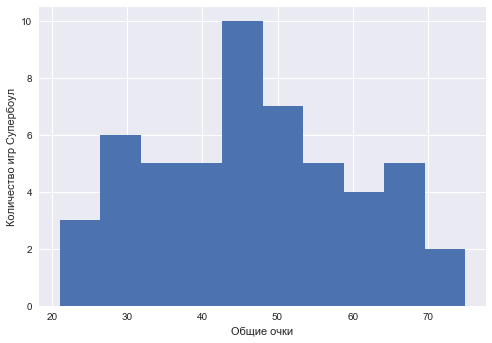

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

plt.hist(super_bowls['combined_pts'])
plt.xlabel('Общие очки')
plt.ylabel('Количество игр Супербоул')
plt.show()

In [9]:
super_bowls[super_bowls['combined_pts'] > 70]

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


In [10]:
super_bowls[super_bowls['combined_pts'] < 25]

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


# Распределение разрывов в очках игры

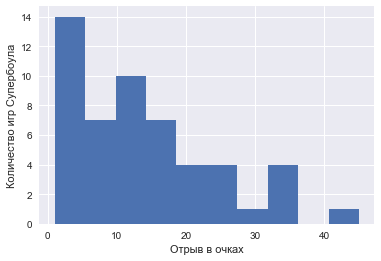

In [11]:
plt.hist(super_bowls['difference_pts'])
plt.xlabel('Отрыв в очках')
plt.ylabel('Количество игр Супербоула')
plt.show()

In [12]:
super_bowls[super_bowls['difference_pts'] == 1]

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


In [13]:
super_bowls[super_bowls['difference_pts'] >= 35] 

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


# Взаимосвязь разрывов в очках с общим количеством телевизионных просмотров

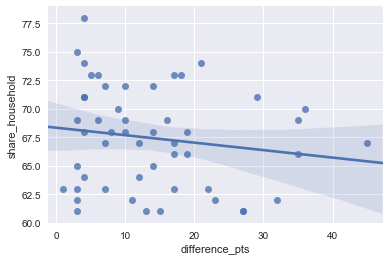

In [14]:
games_tv = pd.merge(tv[tv['super_bowl']>1], super_bowls, on='super_bowl')

import seaborn as sns 

sns.regplot(x='difference_pts', y='share_household', data=games_tv)

#  Корреляция телевизонных просмотров со стоимостью рекламы

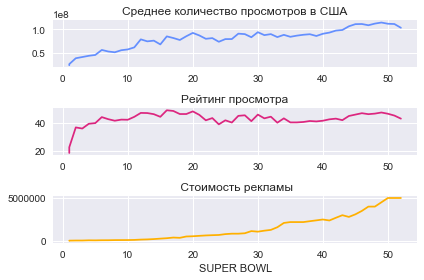

In [15]:
plt.subplot(3,1,1)
plt.plot(tv['super_bowl'], tv['avg_us_viewers'], color='#648FFF')
plt.title('Среднее количество просмотров в США')

plt.subplot(3,1,2)
plt.plot(tv['super_bowl'], tv['rating_household'], color='#DC267F')
plt.title('Рейтинг просмотра')

plt.subplot(3,1,3)
plt.plot(tv['super_bowl'], tv['ad_cost'], color='#FFB000')
plt.title(' Стоимость рекламы')
plt.xlabel('SUPER BOWL')

plt.tight_layout()

# Музыкальные выступления во время перерывов тайма

In [16]:
halftime_musicians[halftime_musicians['super_bowl'] <= 27] 

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


# Кто чаще всего выступал в Супербоуле?

In [17]:
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

halftime_appearances[halftime_appearances['super_bowl'] > 1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


# Наиболее продуктивный музыкант за всё время трансляций Супербоула

In [18]:
halftime_musicians.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
super_bowl    134 non-null int64
musician      134 non-null object
num_songs     88 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


In [34]:
pure_music = halftime_musicians.dropna().sort_values(by='num_songs', ascending=False)  
pure_music.head() 

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
95,21,Spirit of Troy,8.0
94,21,Grambling State University Tiger Marching Band,8.0


In [30]:
max_songs = int(pure_music['num_songs'].max())
max_songs 

11

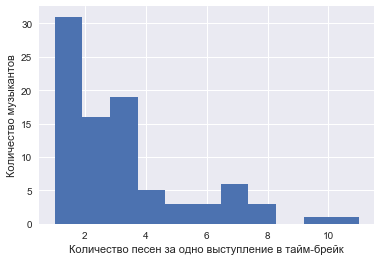

In [31]:
plt.hist(pure_music.num_songs, bins = max_songs)
plt.xlabel('Количество песен за одно выступление в тайм-брейк')
plt.ylabel('Количество музыкантов')
plt.show()

# Заключение

__Создать общее важное заключение и сделать прогноз на будущее__ 

Заключение является невероятно важным моментом в анализе. Это своего рода заключительная часть дипмломной работы

In [22]:
no_bands.to_excel('no_bands.xlsx') 

NameError: name 'no_bands' is not defined

In [ ]:
no_bands.info()

In [23]:
# max_songs = int(max(pure_music['num_songs'].values))
# max_songs 

In [24]:
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

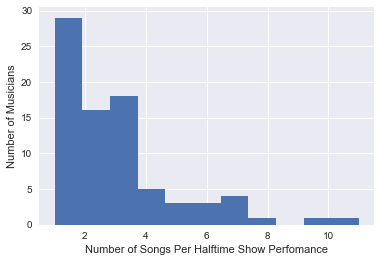

In [25]:
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs Per Halftime Show Perfomance')
plt.ylabel('Number of Musicians')
plt.show()

In [26]:
no_bands = no_bands.sort_values('num_songs', ascending=False)
no_bands.head(15)

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0
